# A Semi-automatic Classification of Normal Karyotypes using Convolutional Neural Network Algorithm

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

## Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

%matplotlib inline

## Samples


## Chormosome Label Convert by using Dictionary

In [2]:
chromConvert = {'chr_01': 1, 
               'chr_02': 2, 
               'chr_03': 3, 
               'chr_04': 4, 
               'chr_05': 5, 
               'chr_06': 6, 
               'chr_07': 7, 
               'chr_08': 8, 
               'chr_09': 9, 
               'chr_10': 10, 
               'chr_11': 11, 
               'chr_12': 12, 
               'chr_13': 13, 
               'chr_14': 14, 
               'chr_15': 15, 
               'chr_16': 16, 
               'chr_17': 17, 
               'chr_18': 18, 
               'chr_19': 19, 
               'chr_20': 20, 
               'chr_21': 21, 
               'chr_22': 22, 
               'chr_x': 0, 
               'chr_y': 23, 
                'chr_18_p11_deletion': 24,
                'chr_18_q10_isochromosome': 25,
                'chr_9_inversion': 26,
                'chr_5_p14_deletion': 27,
                'chr_x_isochromosome': 28,
                'chr_x_p22_cnv': 29, 
                'chr_x_q21_cnv': 30,
                'chr_x_q22_deletion': 31
               }

## File Import

In [3]:
#pathBase = 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\'
#pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\'
pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\'

theWhole = {}


f = []
f_01 = []
mypath_01 = pathBase + 'chr_01'
for (dirpath, dirnames, filenames) in walk(mypath_01):
    f.extend(filenames)
for l in f:
    f_01.append(mypath_01 + '\\' + l) 
        
f = []
f_02 = []
mypath_02 = pathBase + 'chr_02'
for (dirpath, dirnames, filenames) in walk(mypath_02):
    f.extend(filenames)
for l in f:
    f_02.append(mypath_02 + '\\' + l)    
        
f = []
f_03 = []
mypath_03 = pathBase + 'chr_03'
for (dirpath, dirnames, filenames) in walk(mypath_03):
    f.extend(filenames)
for l in f:
    f_03.append(mypath_03 + '\\' + l)    
        
f = []
f_04 = []
mypath_04 = pathBase + 'chr_04'
for (dirpath, dirnames, filenames) in walk(mypath_04):
    f.extend(filenames)
for l in f:
    f_04.append(mypath_04 + '\\' + l)    
        
f = []
f_05 = []
mypath_05 = pathBase + 'chr_05'
for (dirpath, dirnames, filenames) in walk(mypath_05):
    f.extend(filenames)
for l in f:
    f_05.append(mypath_05 + '\\' + l)    
        
f = []
f_06 = []
mypath_06 = pathBase + 'chr_06'
for (dirpath, dirnames, filenames) in walk(mypath_06):
    f.extend(filenames)
for l in f:
    f_06.append(mypath_06 + '\\' + l)    
    
f = []
f_07 = []
mypath_07 = pathBase + 'chr_07'
for (dirpath, dirnames, filenames) in walk(mypath_07):
    f.extend(filenames)
for l in f:
    f_07.append(mypath_07 + '\\' + l)    
        
f = []
f_08 = []
mypath_08 = pathBase + 'chr_08'
for (dirpath, dirnames, filenames) in walk(mypath_08):
    f.extend(filenames)
for l in f:
    f_08.append(mypath_08 + '\\' + l)    
        
f = []
f_09 = []
mypath_09 = pathBase + 'chr_09'
for (dirpath, dirnames, filenames) in walk(mypath_09):
    f.extend(filenames)
for l in f:
    f_09.append(mypath_09 + '\\' + l)    
    
f = []
f_10 = []
mypath_10 = pathBase + 'chr_10'
for (dirpath, dirnames, filenames) in walk(mypath_10):
    f.extend(filenames)
for l in f:
    f_10.append(mypath_10 + '\\' + l)    
    
f = []
f_11 = []
mypath_11 = pathBase + 'chr_11'
for (dirpath, dirnames, filenames) in walk(mypath_11):
    f.extend(filenames)
for l in f:
    f_11.append(mypath_11 + '\\' + l)    
    
    
f = []
f_12 = []
mypath_12 = pathBase + 'chr_12'
for (dirpath, dirnames, filenames) in walk(mypath_12):
    f.extend(filenames)
for l in f:
    f_12.append(mypath_12 + '\\' + l)    
    
    
f = []
f_13 = []
mypath_13 = pathBase + 'chr_13'
for (dirpath, dirnames, filenames) in walk(mypath_13):
    f.extend(filenames)
for l in f:
    f_13.append(mypath_13 + '\\' + l)    
    
    
f = []
f_14 = []
mypath_14 = pathBase + 'chr_14'
for (dirpath, dirnames, filenames) in walk(mypath_14):
    f.extend(filenames)
for l in f:
    f_14.append(mypath_14 + '\\' + l)    
    

    
f = []
f_15 = []
mypath_15 = pathBase + 'chr_15'
for (dirpath, dirnames, filenames) in walk(mypath_15):
    f.extend(filenames)
for l in f:
    f_15.append(mypath_15 + '\\' + l)    
    
        
f = []
f_16 = []
mypath_16 = pathBase + 'chr_16'
for (dirpath, dirnames, filenames) in walk(mypath_16):
    f.extend(filenames)
for l in f:
    f_16.append(mypath_16 + '\\' + l)    
    
        
f = []
f_17 = []
mypath_17 = pathBase + 'chr_17'
for (dirpath, dirnames, filenames) in walk(mypath_17):
    f.extend(filenames)
for l in f:
    f_17.append(mypath_17 + '\\' + l)    
    
        
f = []
f_18 = []
mypath_18 = pathBase + 'chr_18'
for (dirpath, dirnames, filenames) in walk(mypath_18):
    f.extend(filenames)
for l in f:
    f_18.append(mypath_18 + '\\' + l)    
    
        
f = []
f_19 = []
mypath_19 = pathBase + 'chr_19'
for (dirpath, dirnames, filenames) in walk(mypath_19):
    f.extend(filenames)
for l in f:
    f_19.append(mypath_19 + '\\' + l)    
    
        
f = []
f_20 = []
mypath_20 = pathBase + 'chr_20'
for (dirpath, dirnames, filenames) in walk(mypath_20):
    f.extend(filenames)
for l in f:
    f_20.append(mypath_20 + '\\' + l)    
   
        
f = []
f_21 = []
mypath_21 = pathBase + 'chr_21'
for (dirpath, dirnames, filenames) in walk(mypath_21):
    f.extend(filenames)
for l in f:
    f_21.append(mypath_21 + '\\' + l)    
   
        
f = []
f_22 = []
mypath_22 = pathBase + 'chr_22'
for (dirpath, dirnames, filenames) in walk(mypath_22):
    f.extend(filenames)
for l in f:
    f_22.append(mypath_22 + '\\' + l)    
   
f = []
f_x = []
mypath_x = pathBase + 'chr_x'
for (dirpath, dirnames, filenames) in walk(mypath_x):
    f.extend(filenames)
for l in f:
    f_x.append(mypath_x + '\\' + l)    
   
f = []
f_y = []
mypath_y = pathBase + 'chr_y'
for (dirpath, dirnames, filenames) in walk(mypath_y):
    f.extend(filenames)
for l in f:
    f_y.append(mypath_y + '\\' + l)  
    
# ///////// Abnormal ones //////////////

f = []
f_18_p11_deletion = []
mypath_18_p11_deletion = pathBase + 'chr_18_p11_deletion'
for (dirpath, dirnames, filenames) in walk(mypath_18_p11_deletion):
    f.extend(filenames)
for l in f:
    f_18_p11_deletion.append(mypath_18_p11_deletion + '\\' + l)  


f = []
f_18_q10_isochromosome = []
mypath_18_q10_isochromosome = pathBase + 'chr_18_q10_isochromosome'
for (dirpath, dirnames, filenames) in walk(mypath_18_q10_isochromosome):
    f.extend(filenames)
for l in f:
    f_18_q10_isochromosome.append(mypath_18_q10_isochromosome + '\\' + l)  
    
# ///////// Abnormal ones //////////////

f = []
f_9_inversion = []
mypath_9_inversion = pathBase + 'chr_9_inversion'
for (dirpath, dirnames, filenames) in walk(mypath_9_inversion):
    f.extend(filenames)
for l in f:
    f_9_inversion.append(mypath_9_inversion + '\\' + l)  
    

f = []
f_5_p14_deletion = []
mypath_5_p14_deletion = pathBase + 'chr_5_p14_deletion'
for (dirpath, dirnames, filenames) in walk(mypath_5_p14_deletion):
    f.extend(filenames)
for l in f:
    f_5_p14_deletion.append(mypath_5_p14_deletion + '\\' + l)  
    

f = []
f_x_isochromosome = []
mypath_x_isochromosome = pathBase + 'chr_x_isochromosome'
for (dirpath, dirnames, filenames) in walk(mypath_x_isochromosome):
    f.extend(filenames)
for l in f:
    f_x_isochromosome.append(mypath_x_isochromosome + '\\' + l)  
    
    
f = []
f_x_p22_cnv = []
mypath_x_p22_cnv = pathBase + 'chr_x_p22_cnv'
for (dirpath, dirnames, filenames) in walk(mypath_x_p22_cnv):
    f.extend(filenames)
for l in f:
    f_x_p22_cnv.append(mypath_x_p22_cnv + '\\' + l)
    
    
f = []
f_x_q21_cnv = []
mypath_x_q21_cnv = pathBase + 'chr_x_q21_cnv'
for (dirpath, dirnames, filenames) in walk(mypath_x_q21_cnv):
    f.extend(filenames)
for l in f:
    f_x_q21_cnv.append(mypath_x_q21_cnv + '\\' + l)  
    
    
f = []
f_x_q22_deletion = []
mypath_x_q22_deletion = pathBase + 'chr_x_q22_deletion'
for (dirpath, dirnames, filenames) in walk(mypath_x_q22_deletion):
    f.extend(filenames)
for l in f:
    f_x_q22_deletion.append(mypath_x_q22_deletion + '\\' + l)      

    
theWhole['chr_01'] = f_01
theWhole['chr_02'] = f_02
theWhole['chr_03'] = f_03
theWhole['chr_04'] = f_04
theWhole['chr_05'] = f_05
theWhole['chr_06'] = f_06
theWhole['chr_07'] = f_07
theWhole['chr_08'] = f_08
theWhole['chr_09'] = f_09
theWhole['chr_10'] = f_10
theWhole['chr_11'] = f_11
theWhole['chr_12'] = f_12
theWhole['chr_13'] = f_13
theWhole['chr_14'] = f_14
theWhole['chr_15'] = f_15
theWhole['chr_16'] = f_16
theWhole['chr_17'] = f_17
theWhole['chr_18'] = f_18
theWhole['chr_19'] = f_19
theWhole['chr_20'] = f_20
theWhole['chr_21'] = f_21
theWhole['chr_22'] = f_22
theWhole['chr_x'] = f_x
theWhole['chr_y'] = f_y

theWhole['chr_18_p11_deletion'] = f_18_p11_deletion
theWhole['chr_18_q10_isochromosome'] = f_18_q10_isochromosome

theWhole['chr_9_inversion'] = f_9_inversion

theWhole['chr_5_p14_deletion'] = f_5_p14_deletion    

theWhole['chr_x_isochromosome'] = f_x_isochromosome
theWhole['chr_x_p22_cnv'] = f_x_p22_cnv
theWhole['chr_x_q21_cnv'] = f_x_q21_cnv
theWhole['chr_x_q22_deletion'] = f_x_q22_deletion

In [4]:
theWhole['chr_x']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_x\\W17068~A.0003.K.jpg.X.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_x\\W17068~A.0004.K.jpg.X.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_x\\W17068~A.0006.K.jpg.X.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_x\\W17068~A.0008.K.X.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_x\\W17068~A.0009.K.X.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_x\\W17068~A.0010.K.X.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_x\\W17068~A.0011.K.X.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_x\\W17068~A.0012.K.X.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_x\\W17068~A.0014.K.X.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_x\\W17068~A.0016.K.X.bmp',
 'D:\\Users\\Chuan

## Image Input

In [5]:
start = time.time()

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in theWhole[chrNo]:
        img = Image.open(case)
        image[chrNo].append(img)
    
end = time.time()
print(end - start)

0.10176491737365723


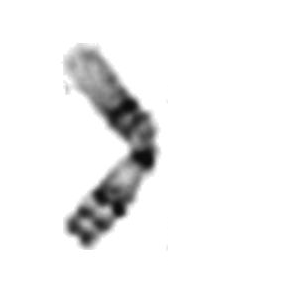

In [6]:
image['chr_01'][1]

## Functions

In [7]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [8]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

## Data Extraction from Images

In [9]:
start = time.time()

data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)
        
end = time.time()
print(end - start)

172.24368333816528


In [10]:
imageMatrix = np.array(data['chr_02'][1])

In [11]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)

In [12]:
len(x_train_list[1])

300

In [13]:
len(y_train_list)

1653

### Validation Dataset

In [14]:
#pathBase = 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\test\\'
#pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\test\\'
pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\test\\'

theWhole = {}

f = []
f_01 = []
mypath_01 = pathBase + 'chr_01'
for (dirpath, dirnames, filenames) in walk(mypath_01):
    f.extend(filenames)
for l in f:
    f_01.append(mypath_01 + '\\' + l) 
        
f = []
f_02 = []
mypath_02 = pathBase + 'chr_02'
for (dirpath, dirnames, filenames) in walk(mypath_02):
    f.extend(filenames)
for l in f:
    f_02.append(mypath_02 + '\\' + l)    
        
f = []
f_03 = []
mypath_03 = pathBase + 'chr_03'
for (dirpath, dirnames, filenames) in walk(mypath_03):
    f.extend(filenames)
for l in f:
    f_03.append(mypath_03 + '\\' + l)    
        
f = []
f_04 = []
mypath_04 = pathBase + 'chr_04'
for (dirpath, dirnames, filenames) in walk(mypath_04):
    f.extend(filenames)
for l in f:
    f_04.append(mypath_04 + '\\' + l)    
        
f = []
f_05 = []
mypath_05 = pathBase + 'chr_05'
for (dirpath, dirnames, filenames) in walk(mypath_05):
    f.extend(filenames)
for l in f:
    f_05.append(mypath_05 + '\\' + l)    
        
f = []
f_06 = []
mypath_06 = pathBase + 'chr_06'
for (dirpath, dirnames, filenames) in walk(mypath_06):
    f.extend(filenames)
for l in f:
    f_06.append(mypath_06 + '\\' + l)    
    
f = []
f_07 = []
mypath_07 = pathBase + 'chr_07'
for (dirpath, dirnames, filenames) in walk(mypath_07):
    f.extend(filenames)
for l in f:
    f_07.append(mypath_07 + '\\' + l)    
        
f = []
f_08 = []
mypath_08 = pathBase + 'chr_08'
for (dirpath, dirnames, filenames) in walk(mypath_08):
    f.extend(filenames)
for l in f:
    f_08.append(mypath_08 + '\\' + l)    
        
f = []
f_09 = []
mypath_09 = pathBase + 'chr_09'
for (dirpath, dirnames, filenames) in walk(mypath_09):
    f.extend(filenames)
for l in f:
    f_09.append(mypath_09 + '\\' + l)    
    
f = []
f_10 = []
mypath_10 = pathBase + 'chr_10'
for (dirpath, dirnames, filenames) in walk(mypath_10):
    f.extend(filenames)
for l in f:
    f_10.append(mypath_10 + '\\' + l)    
    
f = []
f_11 = []
mypath_11 = pathBase + 'chr_11'
for (dirpath, dirnames, filenames) in walk(mypath_11):
    f.extend(filenames)
for l in f:
    f_11.append(mypath_11 + '\\' + l)    
    
    
f = []
f_12 = []
mypath_12 = pathBase + 'chr_12'
for (dirpath, dirnames, filenames) in walk(mypath_12):
    f.extend(filenames)
for l in f:
    f_12.append(mypath_12 + '\\' + l)    
    
    
f = []
f_13 = []
mypath_13 = pathBase + 'chr_13'
for (dirpath, dirnames, filenames) in walk(mypath_13):
    f.extend(filenames)
for l in f:
    f_13.append(mypath_13 + '\\' + l)    
    
    
f = []
f_14 = []
mypath_14 = pathBase + 'chr_14'
for (dirpath, dirnames, filenames) in walk(mypath_14):
    f.extend(filenames)
for l in f:
    f_14.append(mypath_14 + '\\' + l)    
    

    
f = []
f_15 = []
mypath_15 = pathBase + 'chr_15'
for (dirpath, dirnames, filenames) in walk(mypath_15):
    f.extend(filenames)
for l in f:
    f_15.append(mypath_15 + '\\' + l)    
    
        
f = []
f_16 = []
mypath_16 = pathBase + 'chr_16'
for (dirpath, dirnames, filenames) in walk(mypath_16):
    f.extend(filenames)
for l in f:
    f_16.append(mypath_16 + '\\' + l)    
    
        
f = []
f_17 = []
mypath_17 = pathBase + 'chr_17'
for (dirpath, dirnames, filenames) in walk(mypath_17):
    f.extend(filenames)
for l in f:
    f_17.append(mypath_17 + '\\' + l)    
    
        
f = []
f_18 = []
mypath_18 = pathBase + 'chr_18'
for (dirpath, dirnames, filenames) in walk(mypath_18):
    f.extend(filenames)
for l in f:
    f_18.append(mypath_18 + '\\' + l)    
    
        
f = []
f_19 = []
mypath_19 = pathBase + 'chr_19'
for (dirpath, dirnames, filenames) in walk(mypath_19):
    f.extend(filenames)
for l in f:
    f_19.append(mypath_19 + '\\' + l)    
    
        
f = []
f_20 = []
mypath_20 = pathBase + 'chr_20'
for (dirpath, dirnames, filenames) in walk(mypath_20):
    f.extend(filenames)
for l in f:
    f_20.append(mypath_20 + '\\' + l)    
   
        
f = []
f_21 = []
mypath_21 = pathBase + 'chr_21'
for (dirpath, dirnames, filenames) in walk(mypath_21):
    f.extend(filenames)
for l in f:
    f_21.append(mypath_21 + '\\' + l)    
   
        
f = []
f_22 = []
mypath_22 = pathBase + 'chr_22'
for (dirpath, dirnames, filenames) in walk(mypath_22):
    f.extend(filenames)
for l in f:
    f_22.append(mypath_22 + '\\' + l)    
   
f = []
f_x = []
mypath_x = pathBase + 'chr_x'
for (dirpath, dirnames, filenames) in walk(mypath_x):
    f.extend(filenames)
for l in f:
    f_x.append(mypath_x + '\\' + l)    
   
f = []
f_y = []
mypath_y = pathBase + 'chr_y'
for (dirpath, dirnames, filenames) in walk(mypath_y):
    f.extend(filenames)
for l in f:
    f_y.append(mypath_y + '\\' + l)  
    

# ///////// Abnormal ones //////////////

f = []
f_18_p11_deletion = []
mypath_18_p11_deletion = pathBase + 'chr_18_p11_deletion'
for (dirpath, dirnames, filenames) in walk(mypath_18_p11_deletion):
    f.extend(filenames)
for l in f:
    f_18_p11_deletion.append(mypath_18_p11_deletion + '\\' + l)  


f = []
f_18_q10_isochromosome = []
mypath_18_q10_isochromosome = pathBase + 'chr_18_q10_isochromosome'
for (dirpath, dirnames, filenames) in walk(mypath_18_q10_isochromosome):
    f.extend(filenames)
for l in f:
    f_18_q10_isochromosome.append(mypath_18_q10_isochromosome + '\\' + l)  
    


f = []
f_9_inversion = []
mypath_9_inversion = pathBase + 'chr_9_inversion'
for (dirpath, dirnames, filenames) in walk(mypath_9_inversion):
    f.extend(filenames)
for l in f:
    f_9_inversion.append(mypath_9_inversion + '\\' + l)  
    

f = []
f_5_p14_deletion = []
mypath_5_p14_deletion = pathBase + 'chr_5_p14_deletion'
for (dirpath, dirnames, filenames) in walk(mypath_5_p14_deletion):
    f.extend(filenames)
for l in f:
    f_5_p14_deletion.append(mypath_5_p14_deletion + '\\' + l)  
    

f = []
f_x_isochromosome = []
mypath_x_isochromosome = pathBase + 'chr_x_isochromosome'
for (dirpath, dirnames, filenames) in walk(mypath_x_isochromosome):
    f.extend(filenames)
for l in f:
    f_x_isochromosome.append(mypath_x_isochromosome + '\\' + l)  
    
    
f = []
f_x_p22_cnv = []
mypath_x_p22_cnv = pathBase + 'chr_x_p22_cnv'
for (dirpath, dirnames, filenames) in walk(mypath_x_p22_cnv):
    f.extend(filenames)
for l in f:
    f_x_p22_cnv.append(mypath_x_p22_cnv + '\\' + l)
    
    
f = []
f_x_q21_cnv = []
mypath_x_q21_cnv = pathBase + 'chr_x_q21_cnv'
for (dirpath, dirnames, filenames) in walk(mypath_x_q21_cnv):
    f.extend(filenames)
for l in f:
    f_x_q21_cnv.append(mypath_x_q21_cnv + '\\' + l)  
    
    
f = []
f_x_q22_deletion = []
mypath_x_q22_deletion = pathBase + 'chr_x_q22_deletion'
for (dirpath, dirnames, filenames) in walk(mypath_x_q22_deletion):
    f.extend(filenames)
for l in f:
    f_x_q22_deletion.append(mypath_x_q22_deletion + '\\' + l)      

    
theWhole['chr_01'] = f_01
theWhole['chr_02'] = f_02
theWhole['chr_03'] = f_03
theWhole['chr_04'] = f_04
theWhole['chr_05'] = f_05
theWhole['chr_06'] = f_06
theWhole['chr_07'] = f_07
theWhole['chr_08'] = f_08
theWhole['chr_09'] = f_09
theWhole['chr_10'] = f_10
theWhole['chr_11'] = f_11
theWhole['chr_12'] = f_12
theWhole['chr_13'] = f_13
theWhole['chr_14'] = f_14
theWhole['chr_15'] = f_15
theWhole['chr_16'] = f_16
theWhole['chr_17'] = f_17
theWhole['chr_18'] = f_18
theWhole['chr_19'] = f_19
theWhole['chr_20'] = f_20
theWhole['chr_21'] = f_21
theWhole['chr_22'] = f_22
theWhole['chr_x'] = f_x
theWhole['chr_y'] = f_y

theWhole['chr_18_p11_deletion'] = f_18_p11_deletion
theWhole['chr_18_q10_isochromosome'] = f_18_q10_isochromosome

theWhole['chr_9_inversion'] = f_9_inversion

theWhole['chr_5_p14_deletion'] = f_5_p14_deletion    

theWhole['chr_x_isochromosome'] = f_x_isochromosome
theWhole['chr_x_p22_cnv'] = f_x_p22_cnv
theWhole['chr_x_q21_cnv'] = f_x_q21_cnv
theWhole['chr_x_q22_deletion'] = f_x_q22_deletion

In [15]:
image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in theWhole[chrNo]:
        img = Image.open(case)
        image[chrNo].append(img)    

### Data Extraction

In [16]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [17]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

## ChromConvert

In [18]:
y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

## Numpy Array

In [19]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [20]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [21]:
y_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,  0,
        0,  0,  0,  0,  0

In [22]:
len(X_train)

1653

In [23]:
len(y_train)

1653

In [24]:
X_train[0].shape

(300, 300)

## Save the Datasets

In [25]:
np.save('X_train_2D_KaryoLearning_Abnormal', X_train)
np.save('y_train_2D_KaryoLearning_Abnormal', y_train)

In [26]:
np.save('X_test_2D_KaryoLearning_Abnormal', X_test)
np.save('y_test_2D_KaryoLearning_Abnormal', y_test)

## Load the Datasets

In [27]:
X_train = np.load('X_train_2D_KaryoLearning_Abnormal.npy')
y_train = np.load('y_train_2D_KaryoLearning_Abnormal.npy')

X_test = np.load('X_test_2D_KaryoLearning_Abnormal.npy')
y_test = np.load('y_test_2D_KaryoLearning_Abnormal.npy')

## Convolutional Neural Network

## Data Preparation

In [28]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### Training

#### Model

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [31]:
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(32, activation='softmax'))

#### Tensorboard Initilization

In [32]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#### Compile the modal

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training

In [34]:
model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/300
52/52 [==============================] - 8s 113ms/step - loss: 6.7348 - accuracy: 0.0490 - val_loss: 3.4658 - val_accuracy: 0.0317
Epoch 2/300
52/52 [==============================] - 4s 73ms/step - loss: 3.8512 - accuracy: 0.0544 - val_loss: 3.4696 - val_accuracy: 0.0317
Epoch 3/300
52/52 [==============================] - 4s 77ms/step - loss: 3.3853 - accuracy: 0.0623 - val_loss: 3.5263 - val_accuracy: 0.0317
Epoch 4/300
52/52 [==============================] - 5s 97ms/step - loss: 3.3418 - accuracy: 0.0544 - val_loss: 3.6365 - val_accuracy: 0.0317
Epoch 5/300
52/52 [==============================] - 4s 80ms/step - loss: 3.3506 - accuracy: 0.0551 - val_loss: 3.5246 - val_accuracy: 0.0317
Epoch 6/300
52/52 [==============================] - 4s 86ms/step - loss: 3.3235 - accuracy: 0.0538 - val_loss: 3.6108 - val_accuracy: 0.0317
Epoch 7/300
52/52 [==============================] - 5s 90ms/step - loss: 3.3257 - accuracy: 0.0532 - val_loss: 3.6383 - val_accuracy: 0.0317
Epoch

52/52 [==============================] - 4s 69ms/step - loss: 0.6916 - accuracy: 0.7610 - val_loss: 1.9639 - val_accuracy: 0.4984
Epoch 59/300
52/52 [==============================] - 4s 69ms/step - loss: 0.6041 - accuracy: 0.7877 - val_loss: 1.5936 - val_accuracy: 0.6063
Epoch 60/300
52/52 [==============================] - 5s 88ms/step - loss: 0.5041 - accuracy: 0.8264 - val_loss: 1.6275 - val_accuracy: 0.5651
Epoch 61/300
52/52 [==============================] - 4s 83ms/step - loss: 0.4303 - accuracy: 0.8530 - val_loss: 2.0689 - val_accuracy: 0.6095
Epoch 62/300
52/52 [==============================] - 4s 76ms/step - loss: 0.5990 - accuracy: 0.8336 - val_loss: 1.9446 - val_accuracy: 0.6095
Epoch 63/300
52/52 [==============================] - 5s 103ms/step - loss: 0.3747 - accuracy: 0.8826 - val_loss: 1.4572 - val_accuracy: 0.6444
Epoch 64/300
52/52 [==============================] - 4s 69ms/step - loss: 0.3095 - accuracy: 0.9014 - val_loss: 1.7845 - val_accuracy: 0.6571
Epoch 65/30

52/52 [==============================] - 4s 69ms/step - loss: 3.3077 - accuracy: 0.0593 - val_loss: 3.6553 - val_accuracy: 0.0317
Epoch 116/300
52/52 [==============================] - 5s 91ms/step - loss: 3.3064 - accuracy: 0.0665 - val_loss: 3.6580 - val_accuracy: 0.0317
Epoch 117/300
52/52 [==============================] - 4s 72ms/step - loss: 3.3073 - accuracy: 0.0678 - val_loss: 3.6564 - val_accuracy: 0.0317
Epoch 118/300
52/52 [==============================] - 4s 69ms/step - loss: 3.3014 - accuracy: 0.0599 - val_loss: 3.6653 - val_accuracy: 0.0317
Epoch 119/300
52/52 [==============================] - 4s 69ms/step - loss: 3.2916 - accuracy: 0.0714 - val_loss: 3.6538 - val_accuracy: 0.0317
Epoch 120/300
52/52 [==============================] - 5s 89ms/step - loss: 3.2872 - accuracy: 0.0732 - val_loss: 3.6652 - val_accuracy: 0.0317
Epoch 121/300
52/52 [==============================] - 4s 69ms/step - loss: 3.2723 - accuracy: 0.0762 - val_loss: 3.8844 - val_accuracy: 0.0317
Epoch 

Epoch 172/300
52/52 [==============================] - 4s 69ms/step - loss: 0.2470 - accuracy: 0.9208 - val_loss: 2.0395 - val_accuracy: 0.6063
Epoch 173/300
52/52 [==============================] - 4s 69ms/step - loss: 0.3167 - accuracy: 0.9087 - val_loss: 2.4764 - val_accuracy: 0.5238
Epoch 174/300
52/52 [==============================] - 4s 69ms/step - loss: 0.3639 - accuracy: 0.8984 - val_loss: 2.2669 - val_accuracy: 0.6063
Epoch 175/300
52/52 [==============================] - 4s 69ms/step - loss: 0.2969 - accuracy: 0.9080 - val_loss: 1.7720 - val_accuracy: 0.6032
Epoch 176/300
52/52 [==============================] - 4s 69ms/step - loss: 0.2458 - accuracy: 0.9201 - val_loss: 2.1635 - val_accuracy: 0.5873
Epoch 177/300
52/52 [==============================] - 4s 69ms/step - loss: 0.2281 - accuracy: 0.9226 - val_loss: 2.1375 - val_accuracy: 0.6825
Epoch 178/300
52/52 [==============================] - 4s 69ms/step - loss: 0.1584 - accuracy: 0.9504 - val_loss: 2.3558 - val_accuracy:

Epoch 229/300
52/52 [==============================] - 4s 70ms/step - loss: 3.2368 - accuracy: 0.0835 - val_loss: 3.7859 - val_accuracy: 0.0286
Epoch 230/300
52/52 [==============================] - 4s 69ms/step - loss: 3.2973 - accuracy: 0.0853 - val_loss: 3.8379 - val_accuracy: 0.0317
Epoch 231/300
52/52 [==============================] - 4s 69ms/step - loss: 3.2304 - accuracy: 0.0865 - val_loss: 3.9612 - val_accuracy: 0.0317
Epoch 232/300
52/52 [==============================] - 4s 68ms/step - loss: 3.2170 - accuracy: 0.0877 - val_loss: 3.9867 - val_accuracy: 0.0317
Epoch 233/300
52/52 [==============================] - 4s 69ms/step - loss: 3.2113 - accuracy: 0.0895 - val_loss: 4.0120 - val_accuracy: 0.0317
Epoch 234/300
52/52 [==============================] - 4s 70ms/step - loss: 3.1973 - accuracy: 0.0926 - val_loss: 3.7993 - val_accuracy: 0.0286
Epoch 235/300
52/52 [==============================] - 4s 69ms/step - loss: 3.1911 - accuracy: 0.0920 - val_loss: 3.6401 - val_accuracy:

Epoch 286/300
52/52 [==============================] - 4s 69ms/step - loss: 3.2321 - accuracy: 0.0871 - val_loss: 4.0338 - val_accuracy: 0.0349
Epoch 287/300
52/52 [==============================] - 4s 69ms/step - loss: 3.2247 - accuracy: 0.0895 - val_loss: 3.9571 - val_accuracy: 0.0317
Epoch 288/300
52/52 [==============================] - 4s 69ms/step - loss: 3.2211 - accuracy: 0.0895 - val_loss: 3.8513 - val_accuracy: 0.0317ss: 3.2085 - ac
Epoch 289/300
52/52 [==============================] - 4s 69ms/step - loss: 3.2473 - accuracy: 0.0895 - val_loss: 3.8365 - val_accuracy: 0.0317
Epoch 290/300
52/52 [==============================] - 4s 69ms/step - loss: 3.2365 - accuracy: 0.0841 - val_loss: 3.8440 - val_accuracy: 0.0317
Epoch 291/300
52/52 [==============================] - 4s 69ms/step - loss: 3.2133 - accuracy: 0.0889 - val_loss: 4.5378 - val_accuracy: 0.0349
Epoch 292/300
52/52 [==============================] - 4s 69ms/step - loss: 3.2157 - accuracy: 0.0895 - val_loss: 4.2622 

KeyboardInterrupt: 

In [ ]:
model.summary()

### Tensorboard Display

In [ ]:
%tensorboard --logdir logs/fit

## Performance Measures

In [ ]:
#y_predict = clf.predict(X_test)
#y_test = y_test

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

In [ ]:
len(X_test)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
len(y_predict)

In [ ]:
y_predict[12]

In [ ]:
# The number 34 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [ ]:
y_predict_filtered[12]

In [ ]:
len(y_predict_filtered)

In [ ]:
len(y_test)

### Confusion Matrix (混淆矩阵)

In [ ]:
label = ['chr_01', 'chr_02', 'chr_03',  'chr_04', 'chr_05', 'chr_06', 'chr_07',  'chr_08',  'chr_09', 'chr_10',
'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15',  'chr_16', 'chr_17', 'chr_18', 'chr_19',  'chr_20',  
'chr_21', 'chr_22', 'chr_x', 'chr_y',  'chr_18_p11_deletion', 'chr_18_q10_isochromosome', 
'chr_9_inversion', 'chr_5_p14_deletion', 
'chr_x_isochromosome', 'chr_x_p22_cnv', 'chr_x_q21_cnv',  'chr_x_q22_deletion']

In [ ]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,
                                                                   10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
                                                                  20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                                                  30, 31]))
confusion = pd.DataFrame(cm, index=label,
                        columns=label)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN.csv')
confusion

In [ ]:
print(classification_report(y_test, y_predict_filtered))

In [ ]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})

## Save the Model

In [ ]:
model.save('saved_model/model_cnn')

## Load the Model

In [ ]:
model_reload = keras.models.load_model('saved_model/model_cnn')